In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
world_df = pd.read_csv('demand_skills_world.csv')
india_df = pd.read_csv('demand_skills_india.csv')

world_df['demand_count'] = world_df['demand_count'].astype(int)
india_df['demand_count'] = india_df['demand_count'].astype(int)

In [18]:
world_df.head()

,skills,demand_count
0,python,140012
1,sql,97835
2,r,72526
3,sas,35934
4,tableau,35472


In [19]:
india_df.head()

,skills,demand_count
0,python,10142
1,sql,7014
2,r,4709
3,aws,2969
4,spark,2678


In [29]:
# Normalization function using Min-Max scaling
def normalize_column(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Normalize demand_count for both India and World datasets
india_df['normalized_demand'] = normalize_column(india_df, 'demand_count')
world_df['normalized_demand'] = normalize_column(world_df, 'demand_count')

print(world_df.head(10))
print('\n')
print(india_df.head(10))

       skills  demand_count  normalized_demand
0      python        140012           1.000000
1         sql         97835           0.645946
2           r         72526           0.433491
3         sas         35934           0.126320
4     tableau         35472           0.122442
5         aws         33779           0.108230
6       spark         30991           0.084826
7       azure         27227           0.053229
8  tensorflow         24261           0.028331
9       excel         20886           0.000000


       skills  demand_count  normalized_demand
0      python         10142           1.000000
1         sql          7014           0.619233
2           r          4709           0.338649
3         aws          2969           0.126841
4       spark          2678           0.091418
5  tensorflow          2654           0.088497
6     tableau          2584           0.079976
7       azure          2397           0.057212
8     pytorch          2057           0.015825
9      hado

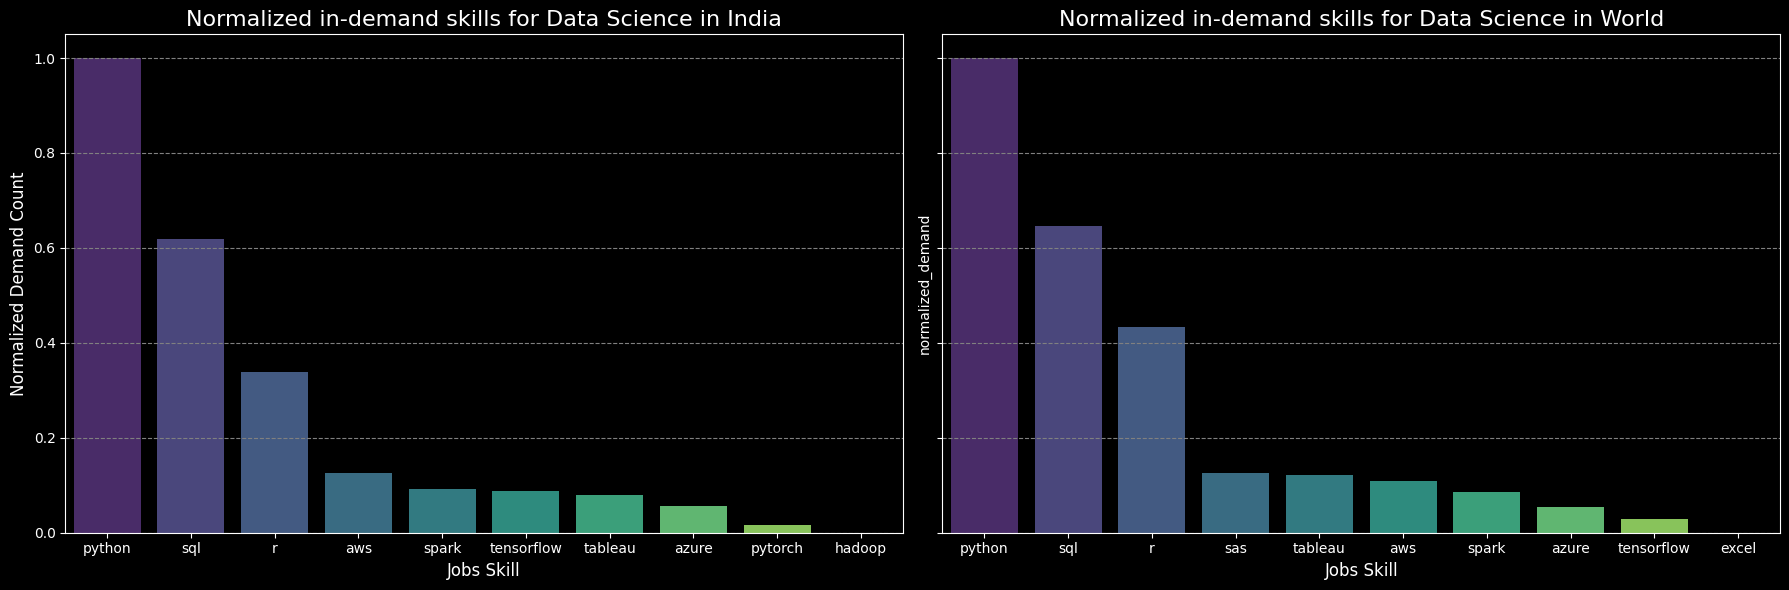

In [27]:
plt.style.use('dark_background')

# Create a figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

sns.barplot(y=india_df['normalized_demand'], x=india_df['skills'], palette='viridis', ax=ax1)
ax1.set_title('Normalized in-demand skills for Data Science in India', fontsize=16, color='white')
ax1.set_xlabel('Jobs Skill', fontsize=12, color='white')
ax1.set_ylabel('Normalized Demand Count', fontsize=12, color='white')

# Add grid lines for readability in India plot
ax1.grid(True, which='both', axis='y', linestyle='--', color='gray')

# Customize ticks color to be readable on the dark background
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

sns.barplot(y=world_df['normalized_demand'], x=world_df['skills'], palette='viridis', ax=ax2)
ax2.set_title('Normalized in-demand skills for Data Science in World', fontsize=16, color='white')
ax2.set_xlabel('Jobs Skill', fontsize=12, color='white')

# Add grid lines for readability in World plot
ax2.grid(True, which='both', axis='y', linestyle='--', color='gray')

# Customize ticks color to be readable on the dark background
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()

## Key Observations:
### 1) Python and SQL are universally critical: Both in India and globally, Python and SQL are the top two skills. Their dominance highlights that programming and database querying are essential for any data science role, regardless of region.
### 2) R is more important globally: The normalized demand for R is higher globally than in India, indicating that R is more critical on the global stage. This could be due to the prevalence of industries such as academia, healthcare, and finance, where R is widely used.
### 3) SAS is more prominent globally: SAS ranks fourth globally, but it doesn't even appear in India's top 10. This suggests that SAS has become more regionally specialized and less relevant in India's job market.
### 4) Cloud and Big Data Skills (AWS and Spark): AWS and Spark are in demand both globally and in India, though their normalized demand is quite similar across regions. This reflects the growing importance of cloud computing and big data technologies for data scientists worldwide.
### 5) India prioritizes TensorFlow more than the world: TensorFlow appears more prominently in India's top skills than globally. This suggests that deep learning technologies, especially TensorFlow, are gaining ground in the Indian market, perhaps due to the rise of AI and machine learning startups.
### 6) Excel vs. Tableau: Tableau is present in both markets but has slightly higher demand globally than in India.Interestingly, Excel has no significant demand globally in this dataset, possibly indicating that companies are transitioning to more advanced tools for data analysis and reporting.
### 7) PyTorch and Hadoop in India: PyTorch is a deep learning tool that makes the top 10 list in India, indicating that it is an emerging skill in the Indian market, even though its demand is still low.Hadoop, once a dominant big data technology, is now virtually obsolete in India's data science job market, with Spark taking the lead.